In [1]:
import os
import pandas as pd
import numpy as np
from itertools import zip_longest
import spatialdm as sdm
import squidpy as sq
import networkx as nx

## CelltalkDB

In [10]:
celltalkdb = pd.read_csv(
    '/n/fs/ragr-research/users/hirak/Projects/copulacci/src/copulacci/_data/LRdatabase/CellTalkDB/lrpairs.csv',index_col=0
)

## Cell chat

In [87]:
geneInter = pd.read_csv('https://figshare.com/ndownloader/files/36638943', header=0, index_col=0)
comp = pd.read_csv('https://figshare.com/ndownloader/files/36638940', header=0, index_col=0)

In [88]:
geneInter = geneInter.sort_values('annotation')
ligand = geneInter.ligand.values
receptor = geneInter.receptor.values


In [89]:
ligand[:3]

array(['VSIR', 'EFNA5', 'EFNA5'], dtype=object)

In [90]:
receptor[:3]

array(['IGSF11', 'EPHA7', 'EPHA8'], dtype=object)

In [91]:
ligand_dict = defaultdict(list)
for i in range(len(ligand)):
    ligand_dict[ligand[i]].append(receptor[i])

In [95]:
lr_df = pd.DataFrame(np.vstack([ligand, receptor]).T, columns = ['ligand', 'receptor'])

In [103]:
lr_df.index = geneInter.index

In [104]:
lr_df.to_csv('/n/fs/ragr-research/users/hirak/Projects/copulacci/src/copulacci/_data/LRdatabase/SpatialDM/human_lr_pairs.csv')

interaction_name          NPNT1_ITGA8_ITGB1
pathway_name                           NPNT
ligand                       Npnt complex 1
receptor                        ITGA8_ITGB1
agonist                                 NaN
antagonist                              NaN
co_A_receptor                           NaN
co_I_receptor                           NaN
evidence                     KEGG: hsa04512
annotation                     ECM-Receptor
interaction_name_2    NPNT1 - (ITGA8+ITGB1)
Name: NPNT1_ITGA8_ITGB1, dtype: object

In [84]:
for i in range(len(ligand)):
    for n in [ligand, receptor]:
        l = n[i]
        if l in comp.index:
            n[i] = comp.loc[l].dropna().values
        else:
            n[i] = pd.Series(l).values
ligand_df = pd.DataFrame.from_records(zip_longest(*pd.Series(ligand).values)).transpose()
ligand_df.columns = ['Ligand' + str(i) for i in range(ligand_df.shape[1])]
ligand_df.index = geneInter.index
receptor_df = pd.DataFrame.from_records(zip_longest(*pd.Series(receptor).values)).transpose()
receptor_df.columns = ['Ligand' + str(i) for i in range(receptor_df.shape[1])]
receptor_df.index = geneInter.index

In [85]:
ligand[:3]

array([array(['VSIR'], dtype=object), array(['EFNA5'], dtype=object),
       array(['EFNA5'], dtype=object)], dtype=object)

In [86]:
receptor[:3]

array([array(['IGSF11'], dtype=object), array(['EPHA7'], dtype=object),
       array(['EPHA8'], dtype=object)], dtype=object)

In [74]:
comp.loc['TGFBR1_ACVR2B'].dropna().values[pd.Series(comp.loc['TGFBR1_ACVR2B'].dropna().values).isin(['TGFBR1'])]

array(['TGFBR1'], dtype=object)

In [73]:
comp.loc['TGFBR1_ACVR2B'].dropna().values

array(['TGFBR1', 'ACVR2B'], dtype=object)

In [71]:
from collections import defaultdict

In [72]:
ligand_dict = defaultdict(list)
for i in range(len(ligand)):
    ligand_dict[ligand[i]].append(receptor[i])

TypeError: unhashable type: 'numpy.ndarray'

In [46]:
edge_list2 = []
for i in range(len(ligand)):
    edge_list2 += [[ ligand[i], receptor[i] ]]

In [48]:
edge_list2[0]

[array(['VSIR'], dtype=object), array(['IGSF11'], dtype=object)]

In [457]:
lr_df = pd.DataFrame(edge_list2, columns=['source', 'target'])

In [494]:
lr_df

,source,target
0,VSIR,IGSF11
1,EFNA5,EPHA7
2,EFNA5,EPHA8
3,EFNA5,EPHB2
4,EFNB1,EPHA4
...,...,...
1934,CCL22,CCR4
1935,CCL17,CCR4
1936,CCL27,CCR3
1937,CXCL1,ACKR1


In [483]:
B3 = nx.from_pandas_edgelist(lr_df, create_using=nx.DiGraph())

In [486]:
geneInter.loc['ALCAM_CD6']

interaction_name              ALCAM_CD6
pathway_name                      ALCAM
agonist                             NaN
antagonist                          NaN
co_A_receptor                       NaN
co_I_receptor                       NaN
evidence                 KEGG: hsa04514
annotation            Cell-Cell Contact
interaction_name_2          ALCAM - CD6
Name: ALCAM_CD6, dtype: object

In [487]:
geneInter.loc['CD6_ALCAM']

interaction_name              CD6_ALCAM
pathway_name                        CD6
agonist                             NaN
antagonist                          NaN
co_A_receptor                       NaN
co_I_receptor                       NaN
evidence                 PMID: 23602662
annotation            Cell-Cell Contact
interaction_name_2          CD6 - ALCAM
Name: CD6_ALCAM, dtype: object

In [473]:
lr_df[lr_df.duplicated()]

,source,target
1548,GH1,GHR


In [472]:
B3.number_of_edges()

1927

In [470]:
B4.number_of_edges()

3

In [474]:
lr_df[100:103]

,source,target
100,ENTPD1,ADORA2B
101,ADGRE5,CD55
102,ALCAM,CD6


In [476]:
nx_df = nx.to_pandas_edgelist(B3)

In [478]:
nx_df.loc[nx_df.target == 'ALCAM']

,source,target
200,CD6,ALCAM


In [479]:
lr_df.loc[lr_df.source == 'CD6']

,source,target
84,CD6,ALCAM


In [481]:
'CD6' in ligand

True

In [482]:
'CD6' in receptor

True

In [434]:
B1 = nx.from_edgelist(edge_list)
B2 = nx.from_edgelist(edge_list2)

In [435]:
for l, r in edge_list:
    if l == 'ALCAM':
        print(l,"_",r)

ALCAM _ CD6


In [436]:
B2.edges('ALCAM')

EdgeDataView([('ALCAM', 'CD6')])

In [441]:
('ALCAM', 'CD6') in B1.edges()

True

In [442]:
('ALCAM', 'CD6') in B2.edges()

True

In [443]:
nxdf= nx.to_pandas_edgelist(B2,edge_key=None)

In [452]:
nxdf[(nxdf['source'] == 'ALCAM') & (nxdf['target'] == 'CD6')]

,source,target


In [453]:
nx.to_pandas_edgelist(B1,edge_key=None)

,source,target
0,ALCAM,CD6


In [293]:
B = nx.Graph()

In [294]:
B.add_nodes_from(ligand, group = 0)
B.add_nodes_from(receptor, group = 1)

In [403]:
for l, rs in ligand_dict.items():
    for r in rs:
        if l == 'ALCAM':
            print(l+';'+r)
        B.add_edge(l, r)

ALCAM;CD6


In [405]:
B.edges('ALCAM')

EdgeDataView([('ALCAM', 'CD6')])

In [406]:
B.edges('CD6')

EdgeDataView([('CD6', 'ALCAM')])

In [415]:
for l,r in B.edges():
    if r == 'CD6':
        print(l,r)

In [416]:
for l,r in B2.edges():
    if r == 'CD6':
        print(l,r)

In [398]:
nxdf= nx.to_pandas_edgelist(B,edge_key=None)

In [399]:
nxdf.loc[nxdf.source == 'ALCAM']

,source,target


In [375]:
df_edges =  pd.DataFrame(list(B.edges()),columns = ['ligand', 'receptor'])

In [354]:
df_edges_indices = (df_edges.ligand + '_' + df_edges.receptor).values

In [358]:
set(ligand_df.index).difference(set(df_edges_indices))

{'AGT_AGTR1B',
 'ALCAM_CD6',
 'ANGPTL1_PIRB',
 'ANGPTL2_PIRB',
 'ANGPTL4_CDH5',
 'ANGPTL7_PIRB',
 'ARTN_GFRA1',
 'ARTN_GFRA3',
 'BAG6_NCR3-PS',
 'CD22_PTPRC',
 'CD48_CD244A',
 'CDH1_ITGA1_ITGB1',
 'CLEC2C_KLRB1',
 'CNTN2_L1CAM',
 'COL1A1_ITGA9_ITGB1',
 'COL1A2_ITGA9_ITGB1',
 'COL2A1_ITGA9_ITGB1',
 'COL4A1_ITGA9_ITGB1',
 'COL4A2_ITGA9_ITGB1',
 'COL4A3_ITGA9_ITGB1',
 'COL4A4_ITGA9_ITGB1',
 'COL4A5_ITGA9_ITGB1',
 'COL4A6_ITGA9_ITGB1',
 'COL6A1_ITGA9_ITGB1',
 'COL6A2_ITGA9_ITGB1',
 'COL6A3_ITGA9_ITGB1',
 'COL6A5_ITGA9_ITGB1',
 'COL6A6_ITGA9_ITGB1',
 'COL9A1_ITGA9_ITGB1',
 'COL9A2_ITGA9_ITGB1',
 'COL9A3_ITGA9_ITGB1',
 'CSPG4_ITGA2_ITGB1',
 'DHH_PTCH1',
 'DHH_PTCH2',
 'EBI3_IL27RA_IL6ST',
 'FASL_FAS',
 'FCER2A_CR2',
 'FCER2A_ITGAM_ITGB2',
 'FCER2A_ITGAV_ITGB3',
 'FCER2A_ITGAX_ITGB2',
 'FGF15_FGFR1',
 'FGF15_FGFR2',
 'FGF15_FGFR3',
 'FGF15_FGFR4',
 'FLT3L_FLT3',
 'FN1_ITGA4_ITGB1',
 'FN1_ITGA4_ITGB7',
 'GDF1_ACVR1B_ACVR2A',
 'GDF1_ACVR1B_ACVR2B',
 'GDF1_ACVR1C_ACVR2A',
 'GDF1_ACVR1C_ACVR2B',


In [393]:
df_edges.loc[df_edges.receptor == 'CD6']

,ligand,receptor


In [372]:
ligand_dict['ALCAM']

['CD6']

In [364]:
receptor_df.loc['AGT_AGTR1B']

Ligand0    AGTR1
Ligand1     None
Ligand2     None
Ligand3     None
Name: AGT_AGTR1B, dtype: object

In [365]:
receptor_df.loc['ALCAM_CD6']

Ligand0     CD6
Ligand1    None
Ligand2    None
Ligand3    None
Name: ALCAM_CD6, dtype: object

In [370]:
np.where(ligand == 'ALCAM')

(array([102]),)

In [371]:
receptor[102]

'CD6'

In [297]:
components = [B.subgraph(c).copy() for c in nx.connected_components(B)]

In [327]:
component_num_edges = np.array([components[i].number_of_edges() for i in range(len(components))])


In [329]:
dict(zip(np.where(component_num_edges > 2)[0], component_num_edges[component_num_edges > 2]))

{1: 52,
 3: 708,
 6: 10,
 7: 25,
 10: 3,
 14: 4,
 16: 4,
 19: 6,
 22: 6,
 24: 9,
 28: 60,
 29: 4,
 31: 15,
 36: 3,
 37: 9,
 38: 6,
 40: 5,
 44: 13,
 46: 35,
 48: 3,
 50: 3,
 51: 7,
 53: 4,
 54: 7,
 55: 5,
 56: 8,
 57: 32,
 60: 16,
 62: 8,
 64: 9,
 67: 3,
 76: 4,
 79: 12,
 80: 320,
 81: 31,
 82: 76,
 83: 4,
 84: 12,
 85: 3,
 89: 26,
 99: 17,
 101: 5,
 110: 5,
 112: 4,
 119: 8,
 132: 3,
 135: 5,
 136: 4,
 140: 18,
 141: 4,
 142: 17,
 144: 5,
 149: 6,
 157: 11,
 158: 6,
 159: 102,
 164: 6}

In [299]:
print(sg)

Graph with 10 nodes and 13 edges


In [302]:
sg.nodes['UTS2R']

{'group': 1}

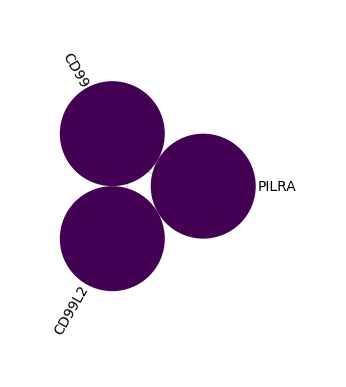

In [341]:
plt.figure(figsize=(3,3))
sg = components[10]
nv.circos(sg, 
          group_by="group", 
          node_color_by="group",
          node_enc_kwargs={"size_scale": 1}
         )
annotate.circos_labels(sg, group_by="group", layout="rotate")
#plt.tight_layout(rect=(0.01, 0.1, 0.95, 0.95))
plt.show()

In [316]:
!pip install pycirclize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.5 MB/s eta 0:00:0000:0100:01


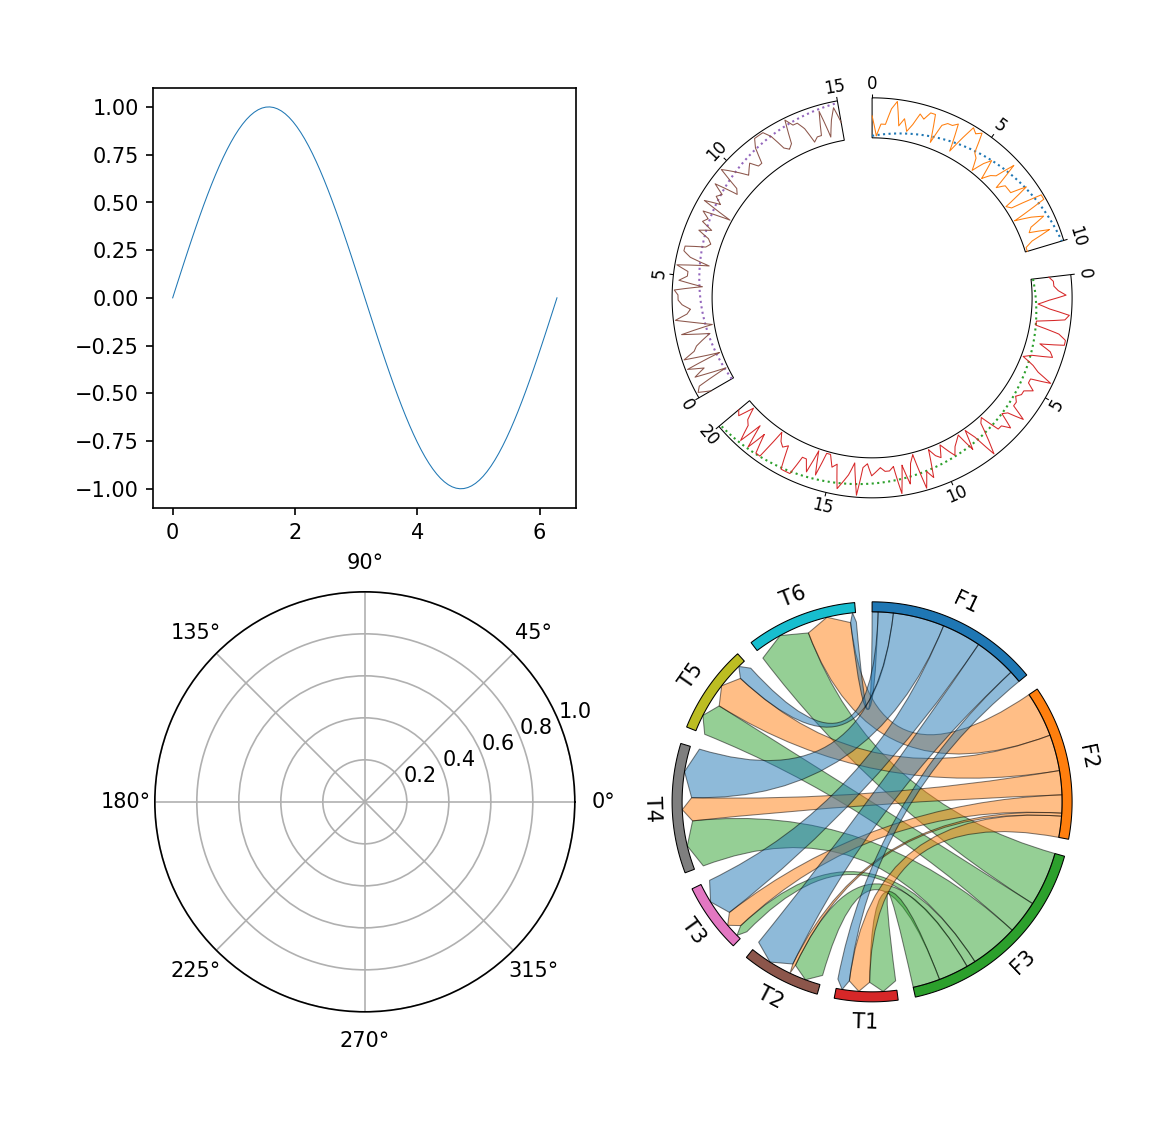

In [317]:
from pycirclize import Circos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)

# Create 4 subplots
fig = plt.figure(figsize=(8, 8), dpi=150)
ax1 = fig.add_subplot(221)
polar_ax2 = fig.add_subplot(222, polar=True)
polar_ax3 = fig.add_subplot(223, polar=True)
polar_ax4 = fig.add_subplot(224, polar=True)

# Plot to first subplot (ax1)
x = np.linspace(0, 2 * np.pi, 100)
ax1.plot(x, np.sin(x))

# Plot circos to second subplot (polar_ax2)
sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=10)
for sector in circos.sectors:
    track = sector.add_track((80, 100), r_pad_ratio=0.1)
    track.axis()
    track.xticks_by_interval(5)
    vmin, vmax = 0, 10
    # Line between start-end two points
    track.line([track.start, track.end], [vmin, vmax], lw=1, ls="dotted")
    # Line of random value points
    x = np.linspace(track.start, track.end, int(track.size) * 5 + 1)
    y = np.random.randint(vmin, vmax, len(x))
    track.line(x, y)

fig = circos.plotfig(ax=polar_ax2)

# Plot chord diagram to fourth subplot (polar_ax4)
row_names = ["F1", "F2", "F3"]
col_names = ["T1", "T2", "T3", "T4", "T5", "T6"]
matrix_data = [
    [4, 14, 13, 17, 5, 2],
    [7, 1, 6, 8, 12, 15],
    [9, 10, 3, 16, 11, 18],
]
matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)

circos = Circos.initialize_from_matrix(
    matrix_df,
    r_lim=(95, 100),
    space=5,
    cmap="tab10",
    link_kws=dict(ec="black", lw=0.5, direction=1),
)
fig = circos.plotfig(ax=polar_ax4)

In [291]:
for n, d in B.nodes(data=True):
    B.nodes[n]["degree"] = B.degree(n)

In [292]:
B.nodes['VSIR']

{'group': 0, 'degree': 1}

In [219]:
import nxviz as nv
import matplotlib.pyplot as plt
from nxviz import annotate

<Axes: >

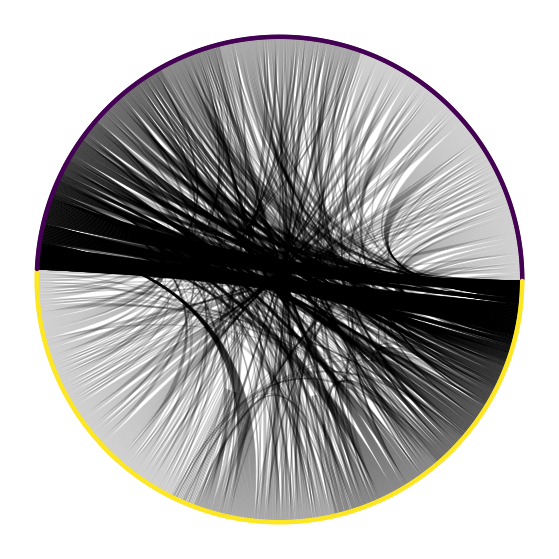

In [220]:
fig, ax = plt.subplots(figsize=(7, 7))
nv.circos(B, sort_by="degree", group_by="bipartite", node_color_by="bipartite", node_enc_kwargs={"size_scale": 3})

In [221]:
nx.number_connected_components(B)

167

In [222]:
components = [B.subgraph(c).copy() for c in nx.connected_components(B)]

In [223]:
component_num_edges = np.array([components[i].number_of_edges() for i in range(len(components))])
np.where(component_num_edges > 2)
component_num_edges[component_num_edges > 2]

In [224]:
np.where(component_num_edges > 2)

(array([  1,   3,   6,   7,  10,  14,  16,  19,  22,  24,  28,  29,  31,
         36,  37,  38,  40,  44,  46,  48,  50,  51,  53,  54,  55,  56,
         57,  60,  62,  64,  67,  76,  79,  80,  81,  82,  83,  84,  85,
         89,  99, 101, 110, 112, 119, 132, 135, 136, 140, 141, 142, 144,
        149, 157, 158, 159, 164]),)

In [225]:
component_num_edges[component_num_edges > 2]

array([ 52, 708,  10,  25,   3,   4,   4,   6,   6,   9,  60,   4,  15,
         3,   9,   6,   5,  13,  35,   3,   3,   7,   4,   7,   5,   8,
        32,  16,   8,   9,   3,   4,  12, 320,  31,  76,   4,  12,   3,
        26,  17,   5,   5,   4,   8,   3,   5,   4,  18,   4,  17,   5,
         6,  11,   6, 102,   6])

In [182]:
compone

(array([  1,   3,   6,   7,  10,  14,  16,  19,  22,  24,  28,  29,  31,
         36,  37,  38,  40,  44,  46,  48,  50,  51,  53,  54,  55,  56,
         57,  60,  62,  64,  67,  76,  79,  80,  81,  82,  83,  84,  85,
         89,  99, 101, 110, 112, 119, 132, 135, 136, 140, 141, 142, 144,
        149, 157, 158, 159, 164]),)

In [183]:
component_num_edges[component_num_edges > 2]

array([ 52, 708,  10,  25,   3,   4,   4,   6,   6,   9,  60,   4,  15,
         3,   9,   6,   5,  13,  35,   3,   3,   7,   4,   7,   5,   8,
        32,  16,   8,   9,   3,   4,  12, 320,  31,  76,   4,  12,   3,
        26,  17,   5,   5,   4,   8,   3,   5,   4,  18,   4,  17,   5,
         6,  11,   6, 102,   6])

In [184]:
component_num_edges[44]

13

In [194]:
G = nx.barbell_graph(m1=10, m2=3)
for n, d in G.nodes(data=True):
    G.nodes[n]["class"] = choice(["a", "b", "c", "d", "e"])

c = nv.CircosPlot(
    G,
    node_grouping="class",
    node_color="class",
    node_order="class",
    node_labels=True,
    node_label_rotation=True,
    node_label_color=True,
    group_label_color=True,
    node_label_layout="numbers",
    group_order="alphabetically",
    fontsize=10,
    group_legend=True,
    figsize=(12, 12),
)

# Draw the CircosPlot
c.draw()
c.figure.tight_layout()


/n/fs/ragr-data/users/hirak/environments/mambaforge/envs/copulacci/lib/python3.9/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


KeyError: 'node_labels'

In [163]:
G.nodes

AttributeError: 'Graph' object has no attribute 'node'

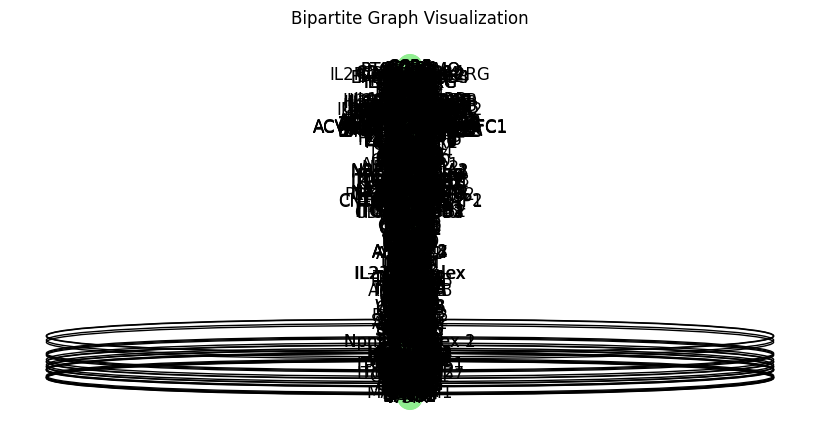

In [149]:
import matplotlib.pyplot as plt

top = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
bottom = set(B) - top

# Calculate the layout
pos = nx.bipartite_layout(B, top)

# Draw the graph
plt.figure(figsize=(8, 4))
nx.draw(B, pos, with_labels=True, node_color=['skyblue' if node in top else 'lightgreen' for node in B])
plt.title('Bipartite Graph Visualization')
plt.show()

In [79]:
comp_ligand = np.where([ligand[i] in comp.index for i in range(len(ligand))])

In [80]:
comp_rec = np.where([receptor[i] in comp.index for i in range(len(ligand))])

In [83]:
from collections import defaultdict

In [84]:
ligand_dict = {}
receptor_dict = {}

In [85]:
for i in range(len(ligand)):
    l_list = ligand[i].split('_')
    r_list = receptor[i].split('_')
    for l in l_list:
        if l in ligand_dict:
            

(array([   2,  212,  213,  360,  361, 1403, 1404, 1405, 1406, 1407, 1409,
        1460, 1496, 1507, 1525, 1556]),)

In [97]:
[i for i,l in enumerate(ligand) if ('_' in l)]

[2, 212, 213]

In [99]:
[l for i,l in enumerate(ligand) if ('_' in l)]

['ITGA4_ITGB7', 'ITGA4_ITGB1', 'ITGA9_ITGB1']

In [98]:
geneInter.iloc[2]

interaction_name          ITGA4_ITGB7_VCAM1
pathway_name                           VCAM
agonist                                 NaN
antagonist                              NaN
co_A_receptor                           NaN
co_I_receptor                           NaN
evidence                     KEGG: hsa04514
annotation                Cell-Cell Contact
interaction_name_2    ITGA4 - (ITGB7+VCAM1)
Name: ITGA4_ITGB7_VCAM1, dtype: object

In [28]:
lig = pd.DataFrame.from_records(zip_longest(*pd.Series(ligand[t]).values)).transpose()
lig.columns =  ['Ligand' + str(i) for i in range(lig.shape[1])]

In [52]:
adata.var_names_make_unique()
extract_lr2(adata, 'human', min_cell=20)

In [56]:
extract_lr3(adata, 'human', min_cell=3)

In [118]:
adata.uns['ligand'].loc['ITGA4_ITGB7_VCAM1']

Ligand0    ITGA4
Ligand1    ITGB7
Ligand2     None
Name: ITGA4_ITGB7_VCAM1, dtype: object

In [117]:
adata.uns['receptor']

,Receptor0,Receptor1,Receptor2,Receptor3
VSIR_IGSF11,IGSF11,None,None,None
EFNA5_EPHA7,EPHA7,None,None,None
EFNA5_EPHA8,EPHA8,None,None,None
EFNA5_EPHB2,EPHB2,None,None,None
EFNB1_EPHA4,EPHA4,None,None,None
...,...,...,...,...
CCL22_CCR4,CCR4,None,None,None
CCL17_CCR4,CCR4,None,None,None
CCL27_CCR3,CCR3,None,None,None
CXCL1_ACKR1,ACKR1,None,None,None
